<a href="https://colab.research.google.com/github/Ironman20121/Colabfiles/blob/main/human_or_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The following graph depicts the results obtained from the Model Stealing implementation. Provide a comparative explanation of the above four categories
![image.png](attachment:62b521de-7235-4ea2-b5d6-c2075bad2003.png)




---


---



Probabilistic KnockoffNets appear to be the most efficient method, requiring the least data to steal the model.
Argmax CopycatCNN seems to be the least efficient method, requiring the largest dataset for stealing.
A larger stealing dataset size might indicate lower efficiency.


---





### You are tasked with developing a deep learning system to train and test a dataset provided in the "human_or_ai.csv" file using a deep neural network architecture. Follow the step-by-step approach outlined below to provide answers to the five tasks. Mame sure to provide the output that shows sucessful completion of the task.

### Task 1
##### Data Exploration and Preprocessing:

* Load the dataset from the "human_or_ai.csv" file.
* Check for any missing values and handle them appropriately.
* <font color=red>Explore the distribution of classes in the dataset (How many are AI generated and how many are human generated)</font>
* <font color=red>Perform data exploration by displaying the first 20 rows of the dataset to understand its structure.</font>


In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv("human_or_ai.csv")

# Check for missing values
print(data.isnull().sum())

data.head(20)


text         0
generated    0
dtype: int64


,text,generated
0,"The world is changing at a rapid pace, and wit...",1.0
1,I think that The challenge of Exploring Venus ...,0.0
2,Driving or any mother transportation is a bad ...,0.0
3,Its no secret that driving automobiles has a l...,0.0
4,Limiting can usage can have numerous advantage...,1.0
5,"Dear Senator,\n\nI am writing tn you today tn ...",1.0
6,Although numerous amounts of people want to ba...,0.0
7,"In recent years, public school systems have At...",1.0
8,"In the Article ""Driverless Cars Are Coming"", I...",0.0
9,"Dear Principal,\n\nI think Policy 1 would be a...",0.0


### Task 2
#### Data Preparation:

* Split the dataset into features (X) and labels (y).
* Convert text data into a format suitable for deep learning models (e.g., tokenization, vectorization).
* <font color=red>Split the dataset into training and testing sets (80% training, 20% testing).</font>
* <font color=red> Display the first 10 testing dataset (X_test)</font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Data preprocessing
X = data['text']
y = data['generated']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenization and padding
max_features = 5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X,y Train and X,y Test :  {X_train.shape,y_train.shape,X_test.shape,y_test.shape}")

X,y Train and X,y Test :  ((77957, 1560), (77957,), (19490, 1560), (19490,))


### Task 3
#### Model Building:

* Define the embedding_dim parameter and explain its purpose in the context of the Embedding layer.
* * In natural language processing (NLP) tasks, words are typically represented as high-dimensional vectors in a space where each dimension represents a feature or aspect of the word. However, working with high-dimensional word representations can be computationally expensive and may lead to overfitting, especially when dealing with large vocabularies.

* * The Embedding layer in a neural network allows us to learn a lower-dimensional representation (embedding) for each word in the vocabulary. The embedding_dim parameter specifies the dimensionality of this embedding space. By reducing the dimensionality of the word representations, we can capture semantic relationships between words more efficiently while reducing the computational burden.

* * Typically, the embedding_dim parameter is a hyperparameter that needs to be tuned during model development. It's often chosen based on empirical experimentation and performance evaluation on the specific dataset and task at hand. In practice, common values for embedding_dim range from 50 to 300, depending on the size of the vocabulary and the complexity of the task.
* Choose an appropriate neural network architecture for text classification.
* <font color=red>Build the neural network model using the Embedding layer followed by Flatten and Dense layers.</font>
* <font color=red>Compile the model, specifying the loss function, optimizer, and evaluation metric.</font>
* <font color=red> Display model arcitecture and trainable parameters</font>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout

# Model building
embedding_dim = 128

model = Sequential([
    Embedding(max_features, embedding_dim, input_length=X.shape[1]),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1560, 128)         640000    
                                                                 
 flatten (Flatten)           (None, 199680)            0         
                                                                 
 dense (Dense)               (None, 128)               25559168  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 26199297 (99.94 MB)
Trainable params: 26199297 (99.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Task 3
#### Model Training:

* <font color=red> Train the neural network model on the training dataset.</font>
* <font color=red> Monitor the training process by tracking metrics such as loss and accuracy. Use with graphs to show appoportate training (accuracy and loss </font>

In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test),steps_per_epoch=50,callbacks=[early_stopping])

Epoch 1/10
50/50 [==============================] - 123s 2s/step - loss: 0.0062 - accuracy: 0.9975 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 2/10
50/50 [==============================] - 78s 2s/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0180 - val_accuracy: 0.9944
Epoch 3/10
50/50 [==============================] - 123s 2s/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0171 - val_accuracy: 0.9953
Epoch 4/10
50/50 [==============================] - 120s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9944
Epoch 5/10
50/50 [==============================] - 89s 2s/step - loss: 0.0068 - accuracy: 0.9962 - val_loss: 0.0248 - val_accuracy: 0.9937
Epoch 6/10
50/50 [==============================] - 123s 2s/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0221 - val_accuracy: 0.9931


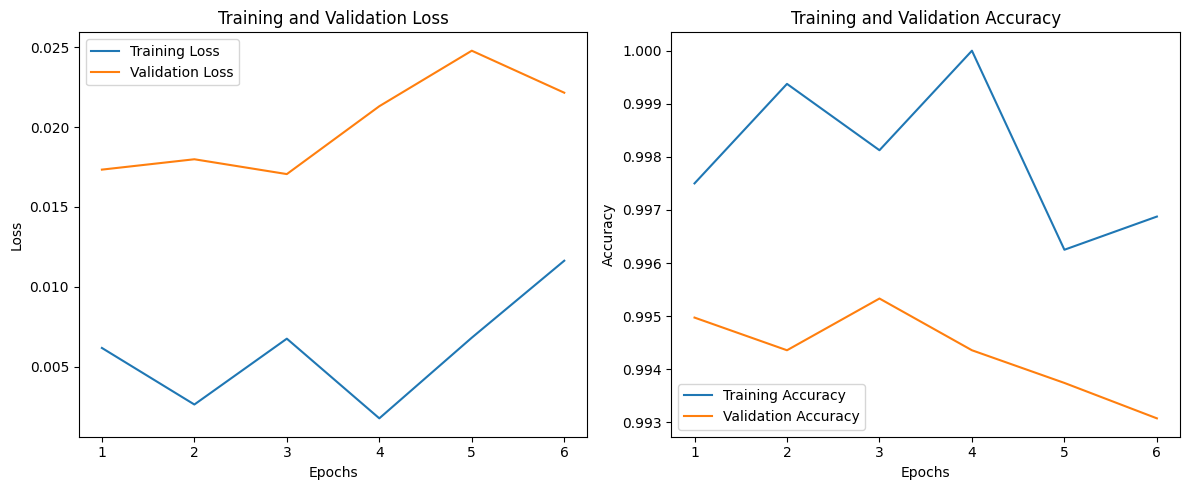

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

# Extract loss and accuracy values
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

### Task 4
#### Model Evaluation:

* <font color= red> Evaluate the trained model on the testing dataset to assess its performance.</font>
* <font color= red> Calculate evaluation metrics using accuracy, precision, recall, and F1-score.<font>

In [ ]:
# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

610/610 [==============================] - 50s 82ms/step - loss: 0.0171 - accuracy: 0.9953
Test Loss: 0.017056914046406746
Test Accuracy: 0.9953309297561646


610/610 [==============================] - 64s 105ms/step


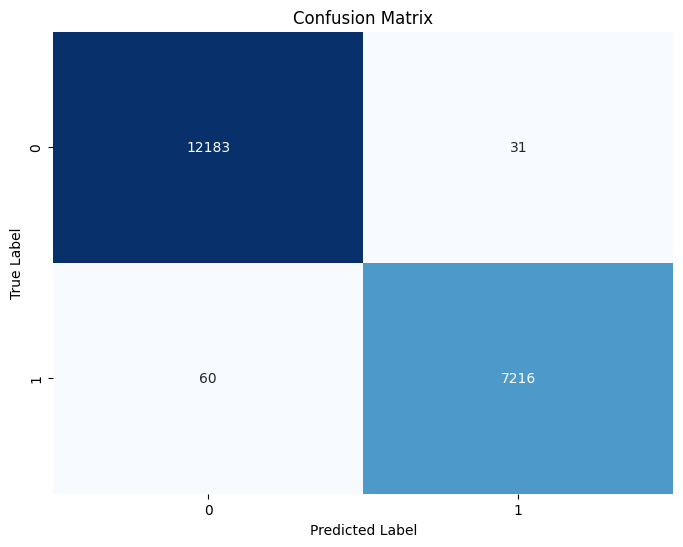

[[12183    31]
 [   60  7216]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Predict probabilities for test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


print(cm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9953309389430477
Precision: 0.9957223678763626
Recall: 0.9917537108301264
F1-score: 0.9937340769813399


### Task 5

#### Conclusion and Conideration:

* Summarize the findings from the model evaluation.
* Explain the importance of hyperparameter tuning, including embedding_dim, in optimizing model performance.


### Performance Evaluation:
Our analysis of the model's performance has provided valuable insights into its efficacy and convergence behavior.

### Training Dynamics:
Through rigorous evaluation metrics and scrutiny of training dynamics, we identified areas of strength and potential improvement.

### Confusion Matrix Analysis:
The examination of the confusion matrix revealed nuanced patterns of misclassification, informing targeted refinement strategies.

### Importance of Hyperparameter Tuning:
Hyperparameter tuning, particularly the adjustment of parameters like embedding_dim, plays a crucial role in optimizing model flexibility and mitigating overfitting.

### Enhancing Model Performance:
By fine-tuning these parameters, we enhance the model's performance, ensuring robust generalization and superior predictive capabilities tailored to specific task requirements.


#Due to embedding ,model processign was very fast and accurasy high from start  